In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
import matplotlib.style
plt.style.use('seaborn-whitegrid')

# Load the data and preprocess it

In [4]:
data_A = pd.read_csv("Company A - Data.csv")

In [5]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
data_A.head()
#total charges need to be converted to a float

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
data_A['TotalCharges'] = pd.to_numeric(data_A.TotalCharges, errors='coerce')

In [8]:
data_A.info()
#got some na values in TotalCharges
#lets check these rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [9]:
data_A[data_A['TotalCharges'].isnull()]
#NaN values
#option 1: drop it - prefered as we have enough data
#option 2: input mean or median

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [10]:
#drop NaN
data_A.dropna(inplace = True)
data_A.isnull().sum()
#no Nas left

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#outlier detection

cont_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = data_A[cont_features]
df_num.describe()


Q1 =df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any()



tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [12]:
#remove CostumerID  & unnamed
data_A = data_A.drop(['Unnamed: 0','customerID'], axis=1)

#replace churn Yes with 1 & No with 0
data_A['Churn']= data_A['Churn'].map({'Yes':1, 'No':0})

In [13]:
#Dummy encoding 
data_A_dummy = pd.get_dummies(data_A)
data_A_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,1,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


# Data visualisation

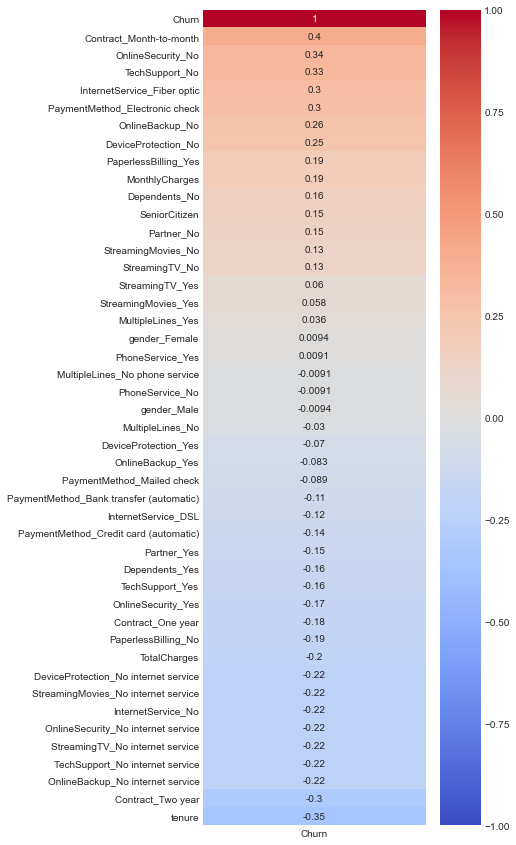

In [14]:
df_corr = data_A_dummy.corr()
plt.figure(figsize=(5,15))
sns.heatmap(df_corr[['Churn']].sort_values(by=['Churn'],ascending=False), 
            vmin=-1,
            cmap = 'coolwarm', 
            annot = True)

#Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.
#Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

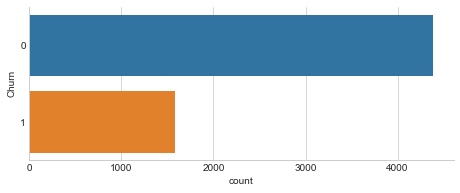

In [15]:
ax = sns.catplot(y="Churn", kind="count", data= data_A, height=2.6, aspect=2.5, orient='h')

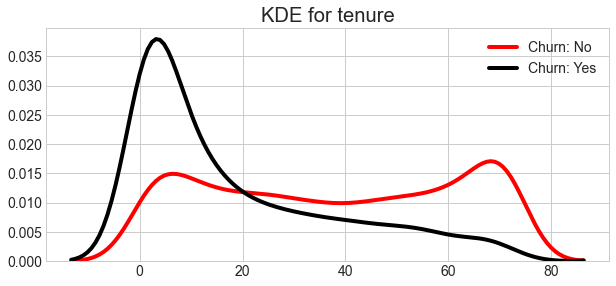

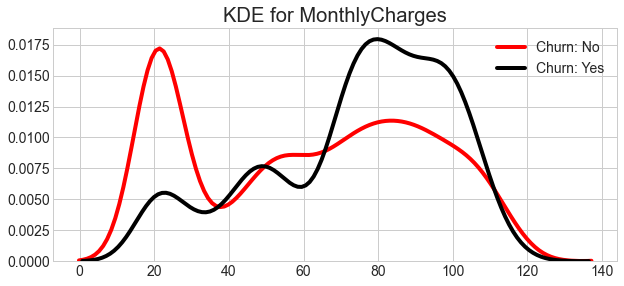

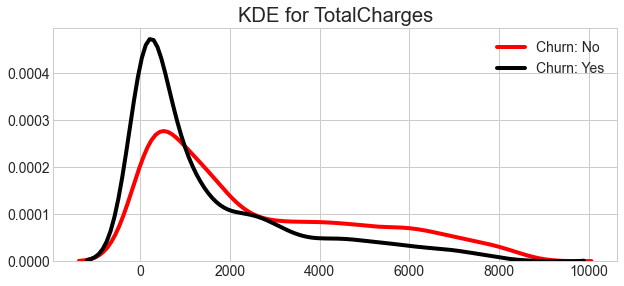

In [84]:
#There are only three numerical columns: tenure, 
#monthly charges and total charges. The probability density distribution 
#can be estimate using the seaborn kdeplot function.

def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data_A[data_A['Churn'] == 0][feature].dropna(), color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(data_A[data_A['Churn'] == 1][feature].dropna(), color= 'black', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

#From the plots above we can conclude that:
#Recent clients are more likely to churn
#Clients with higher MonthlyCharges are also more likely to churn
#Tenure and MonthlyCharges are probably important features

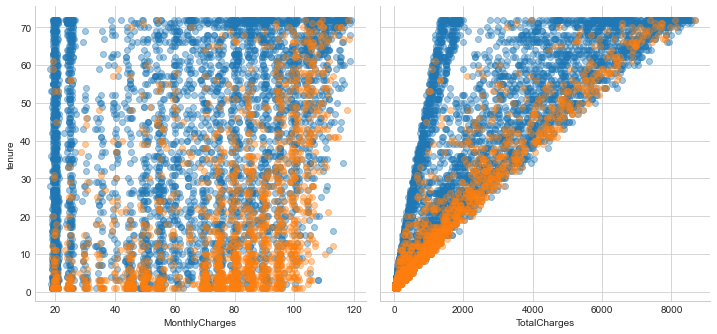

In [16]:
g = sns.PairGrid(data_A, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha= 0.4)

#in fact we can see some boundaries

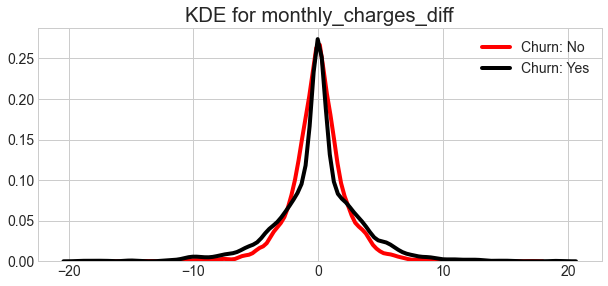

In [86]:
data_A_dummy['total_charges_to_tenure'] = data_A_dummy['TotalCharges'] / data_A_dummy['tenure']
data_A_dummy['monthly_charges_diff'] = data_A_dummy['MonthlyCharges'] - data_A_dummy['total_charges_to_tenure']
data_A['total_charges_to_tenure'] = data_A['TotalCharges'] / data_A['tenure']
data_A['monthly_charges_diff'] = data_A['MonthlyCharges'] - data_A['total_charges_to_tenure']



kdeplot('monthly_charges_diff')

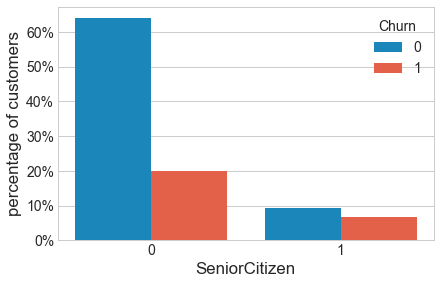

In [87]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data_A.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data_A)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

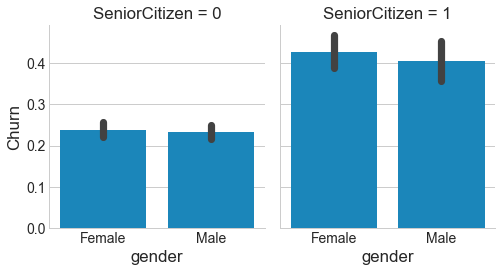

In [88]:
g = sns.FacetGrid(data_A, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "Churn", order= ['Female', 'Male'])

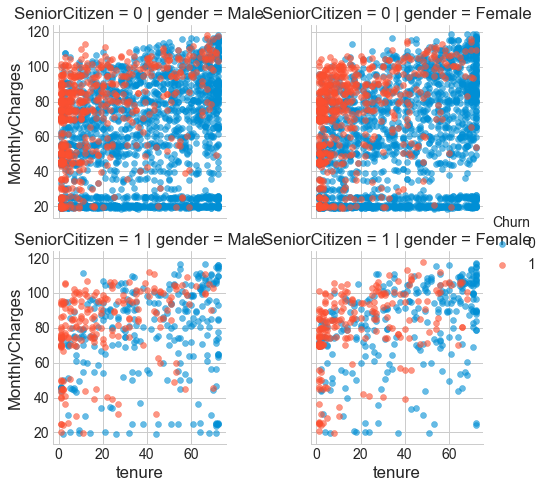

In [89]:
g = sns.FacetGrid(data_A, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend()

Gender is not an indicative of churn.
SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
There are no special relations between this categorical values and the main numerical features.

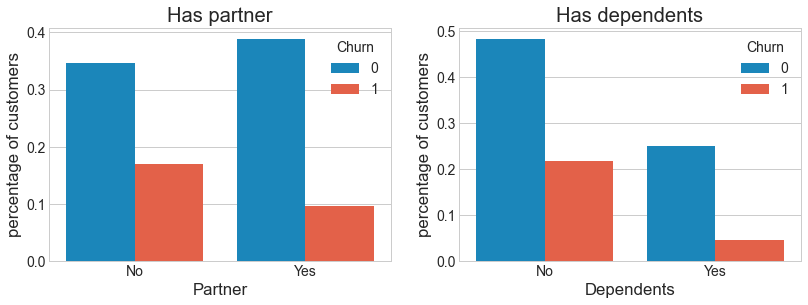

In [90]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = data_A.groupby('Partner')["Churn"].value_counts()/len(data_A)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = data_A.groupby('Dependents')["Churn"].value_counts()/len(data_A)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

Customers that doesn't have partners are more likely to churn
Customers without dependents are also more likely to churn

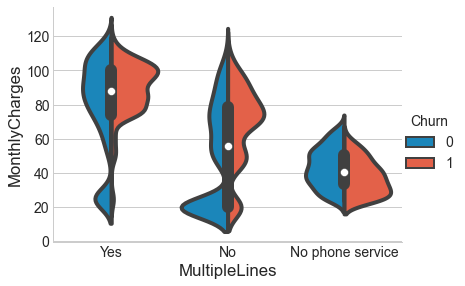

In [91]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, data=data_A, height=4.2, aspect=1.4)

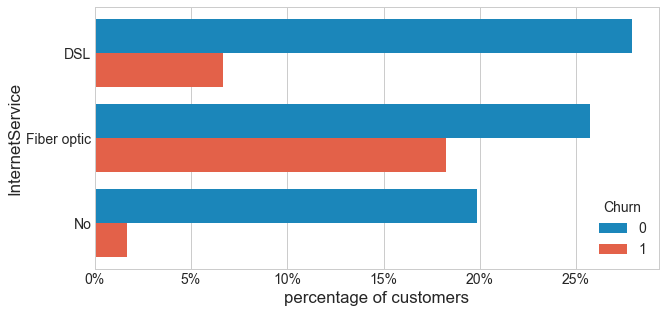

In [92]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

Clients without internet have a very low churn rate
Customers with fiber are more probable to churn than those with DSL connection

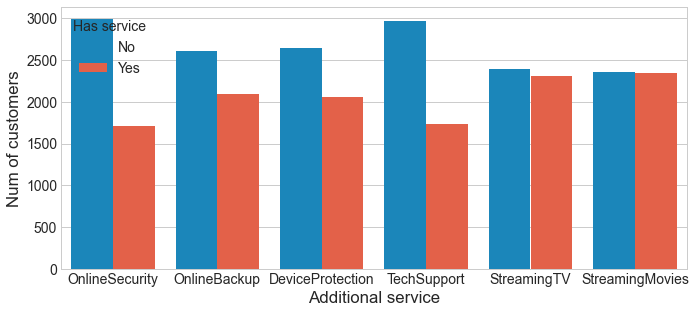

In [93]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
data_A1 = pd.melt(data_A[data_A["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=data_A1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

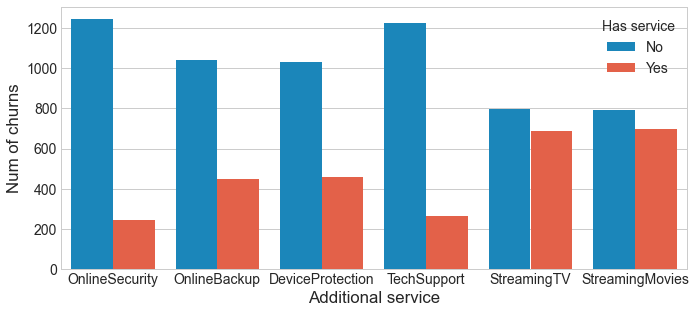

In [94]:
plt.figure(figsize=(10, 4.5))
data_A1 = data_A[(data_A.InternetService != "No") & (data_A.Churn == 1)]
data_A1 = pd.melt(data_A1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=data_A1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

Customers with the first 4 additionals (security to tech support) are more unlikely to churn
Streaming service is not predictive for churn

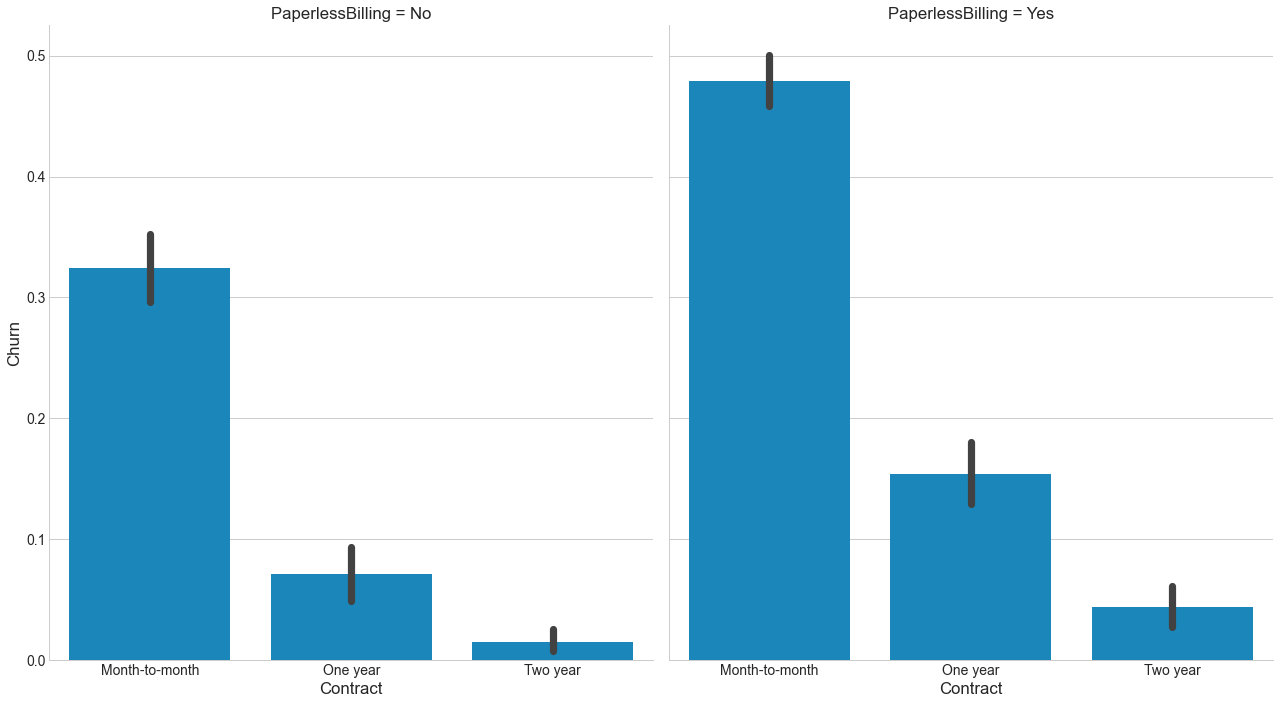

In [95]:
g = sns.FacetGrid(data_A, col="PaperlessBilling", height=10, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", order= ['Month-to-month', 'One year', 'Two year'])

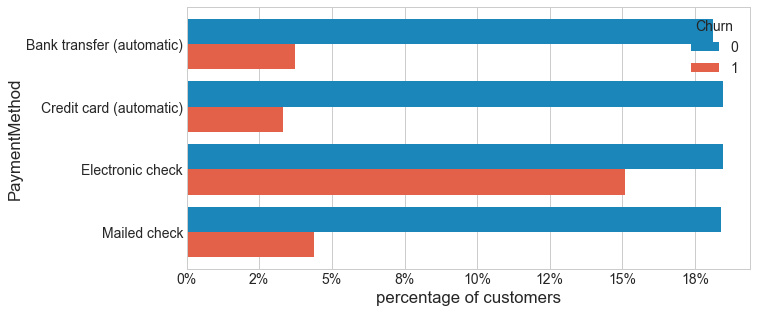

In [96]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:

Customers with paperless billing are more probable to churn
The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
Short term contracts have higher churn rates
One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

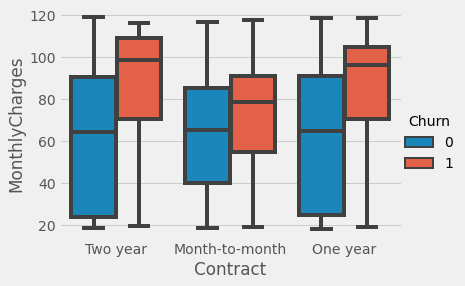

In [80]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=data_A, height=4.2, aspect=1.4)

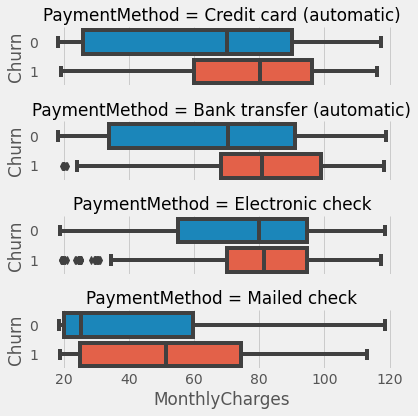

In [81]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=data_A, height=1.5, aspect=4, orient='h')

Longer contracts are more affected by higher monthly charges (for churn rate).
Mailed checks have lower charges
There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check


# Prediction

In [17]:
#drop no values cause we do not need them 
data_A_dummy_final = data_A_dummy.drop(['gender_Male','Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)'], axis=1)



In [35]:
data_A_dummy_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5976 non-null   int64  
 1   tenure                                 5976 non-null   int64  
 2   MonthlyCharges                         5976 non-null   float64
 3   TotalCharges                           5976 non-null   float64
 4   Churn                                  5976 non-null   int64  
 5   gender_Female                          5976 non-null   uint8  
 6   Partner_Yes                            5976 non-null   uint8  
 7   Dependents_Yes                         5976 non-null   uint8  
 8   PhoneService_Yes                       5976 non-null   uint8  
 9   MultipleLines_No phone service         5976 non-null   uint8  
 10  MultipleLines_Yes                      5976 non-null   uint8  
 11  Inte

## Feature importance


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data_A_dummy_final['Churn'].values
std_scaler = StandardScaler()
X = data_A_dummy_final.drop(['Churn'], axis=1).values
X_scale = std_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
X_train_noscale, X_test_noscale, y_train_noscale, y_test_noscale = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                      max_leaf_nodes=50, n_jobs=-1)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
for name, score in zip(data_A_dummy_final.drop(['Churn'], axis=1).keys(), rnd_clf.feature_importances_):
    print(name, score)

SeniorCitizen 0.007734389686907661
tenure 0.17853156950693264
MonthlyCharges 0.07181138194698261
TotalCharges 0.1199637154821653
gender_Female 0.005237491308436707
Partner_Yes 0.006209208187762566
Dependents_Yes 0.005523974897838394
PhoneService_Yes 0.002806638235862173
MultipleLines_No phone service 0.002831260531803644
MultipleLines_Yes 0.008177363668857286
InternetService_DSL 0.023611978295701965
InternetService_Fiber optic 0.08348013142571717
OnlineSecurity_No internet service 0.011130978790245643
OnlineSecurity_Yes 0.028575797506012513
OnlineBackup_No 0.03949746451273065
OnlineBackup_No internet service 0.010612690164526054
OnlineBackup_Yes 0.008697898435247549
DeviceProtection_No internet service 0.008670469660916317
DeviceProtection_Yes 0.005654950135401949
TechSupport_No internet service 0.01313815763074421
TechSupport_Yes 0.019406345956754466
StreamingTV_No internet service 0.013840586200058826
StreamingTV_Yes 0.007248538593895578
StreamingMovies_No internet service 0.01287865

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
for name, score in zip(data_A_dummy_final.drop(['Churn'], axis=1).keys(), pca.explained_variance_ratio_):
    print(name, score)

SeniorCitizen 0.2892414628259814
tenure 0.13891215901274107
MonthlyCharges 0.104152891922639
TotalCharges 0.04560041094183121
gender_Female 0.0426849967745824
Partner_Yes 0.04125852594494951
Dependents_Yes 0.03774572663627163
PhoneService_Yes 0.03517300970032814
MultipleLines_No phone service 0.031176416968910402
MultipleLines_Yes 0.029262693281419637
InternetService_DSL 0.028800348524800345
InternetService_Fiber optic 0.024560541190128876
OnlineSecurity_No internet service 0.02351135408366031
OnlineSecurity_Yes 0.020476578365412213
OnlineBackup_No 0.0197887048026842
OnlineBackup_No internet service 0.018916210694143544
OnlineBackup_Yes 0.017543474598353842
DeviceProtection_No internet service 0.015195314816691438
DeviceProtection_Yes 0.014317129338361647
TechSupport_No internet service 0.011342030219109898
TechSupport_Yes 0.008505639545086346
StreamingTV_No internet service 0.0018051367264378118
StreamingTV_Yes 2.9243085475026167e-05
StreamingMovies_No internet service 4.3530021189780

Could take out a lot of features cause not important -> trail and error?

# Prediction

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
def evaluate1(X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster):
    # Names of models
    model_name_list_class = ['DecisionTree', 'RandomForest',
                      'Naive Bayes', 'KNeighbours', 'SVM', 'Neural Network', 'LogisticRegression', 'ExtraTreesClassifier',
                        'AdaBoostClassifier', 'GradientBoostingClassifier',  'XGB', 'Voting Classifier']
    # Instantiate the models
    model1 = DecisionTreeClassifier()
    model2 = RandomForestClassifier()
    model3 = GaussianNB()
    model4 = KNeighborsClassifier()
    model5 = SVC()
    model6 = MLPClassifier()
    model7 = LogisticRegression()
    model8 = ExtraTreesClassifier()
    model9 = AdaBoostClassifier()
    model10 = GradientBoostingClassifier()
    model11 = XGBClassifier()
    model12 = VotingClassifier([('LogR', model7), ('SVM', model5), ('Ada' ,model9)])

    # Dataframe for results
    results1 = pd.DataFrame(columns=['accuracy'], index = model_name_list_class)   
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]):
        model.fit(X_train_cluster, y_train_cluster)
        predictions1 = model.predict(X_test_cluster)      
        accuracy = accuracy_score(y_test_cluster, predictions1)
        # Insert results into the dataframe
        model_name = model_name_list_class[i]
        results1.loc[model_name, :] = [accuracy]
    
    return results1

In [23]:
evaluate1(X_train, X_test, y_train, y_test)

C:\Users\jom20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jom20\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy
DecisionTree,0.729933
RandomForest,0.798495
Naive Bayes,0.692308
KNeighbours,0.756689
SVM,0.810201
Neural Network,0.778428
LogisticRegression,0.806856
ExtraTreesClassifier,0.784281
AdaBoostClassifier,0.799331
GradientBoostingClassifier,0.801003


## Synthetic Minority Oversampling Technique (SMOTE)

In [24]:
print(X_train.shape, y_train.shape )


(4780, 32) (4780,)


In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy= 0.5)  #first oversample the minority class to have 50 percent the number of examples of the majority class , the idea of not putting it to 1 is keep that 0z are more than 1, we dont want to make them equal so not to have many synthetic values in.
XS_train, YS_train = oversample.fit_resample(X_train, y_train)
X_sample_train,Y_sample_train = oversample.fit_resample(X_train, y_train)


#telecom_churn_prediction(logit_smote, x_smote, x_test, y_smote, y_test, "coefficients", threshold_plot=True)

In [27]:
evaluate1(X_sample_train, X_test, Y_sample_train, y_test)

C:\Users\jom20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jom20\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy
DecisionTree,0.741639
RandomForest,0.785117
Naive Bayes,0.690635
KNeighbours,0.741639
SVM,0.790134
Neural Network,0.765886
LogisticRegression,0.801003
ExtraTreesClassifier,0.773411
AdaBoostClassifier,0.795151
GradientBoostingClassifier,0.798495


Does not improve the accuracy

## K-Cross validation with the best model

In [28]:
from sklearn.model_selection import cross_val_score


Voting = VotingClassifier([('LogR', LogisticRegression()), ('SVM', SVC()), ('Ada' ,AdaBoostClassifier())], voting='hard')
scores = cross_val_score(Voting, X_scale, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores)

0.80 accuracy with a standard deviation of 0.01
[0.81187291 0.8083682  0.79665272 0.78577406 0.80753138]


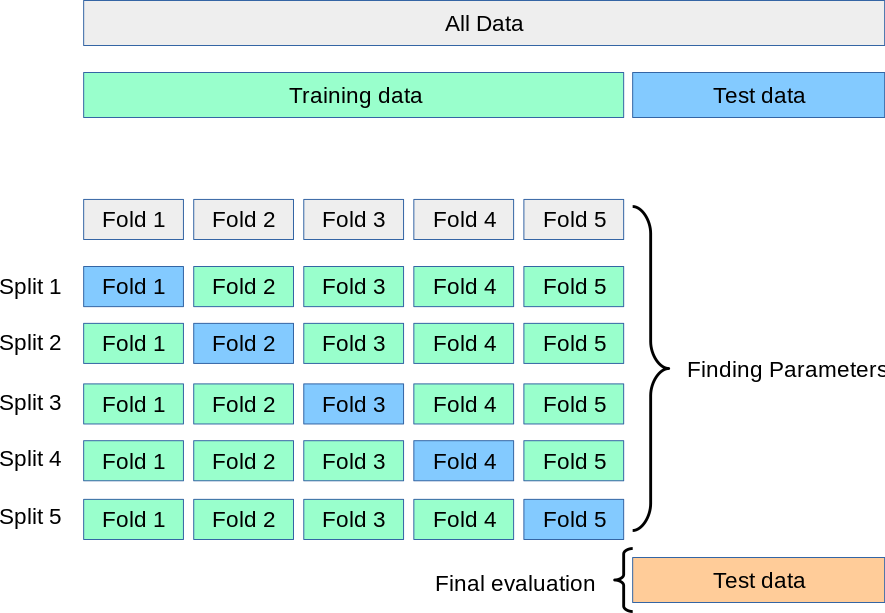

Voting classifier normal data

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       884
           1       0.66      0.54      0.59       312

    accuracy                           0.81      1196
   macro avg       0.75      0.72      0.73      1196
weighted avg       0.80      0.81      0.80      1196

Accuracy Score: 0.8060200668896321
Voting classifier SMOTE Data

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       884
           1       0.60      0.68      0.64       312

    accuracy                           0.80      1196
   macro avg       0.74      0.76      0.75      1196
weighted avg       0.81      0.80      0.80      1196

Accuracy Score: 0.7968227424749164


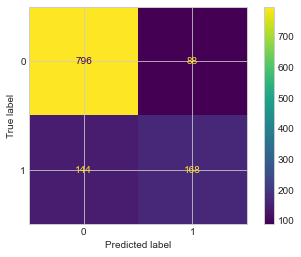

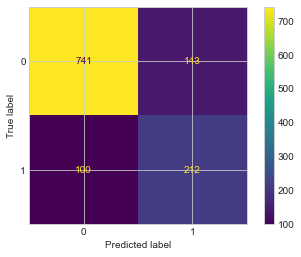

In [29]:
    from sklearn import svm
    from sklearn.metrics import classification_report
    from sklearn.metrics import plot_confusion_matrix
    
    SVM = svm.SVC(probability=True) 
    
    Voting.fit(X_train, y_train)
    predictions = Voting.predict(X_test)
    #probabilities = SVM.predict_proba(X_test)
        
    print('Voting classifier normal data')
    print("\nClassification report:\n", classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    
    plot_confusion_matrix(Voting, X_test, y_test)
    
#vs Smote
     
    Voting.fit(X_sample_train, Y_sample_train)
    predictions1 = Voting.predict(X_test)
    #probabilities1 = Voting.predict_proba(X_test)
        
    print('Voting classifier SMOTE Data')
    print("\nClassification report:\n", classification_report(y_test, predictions1))
    print("Accuracy Score:", accuracy_score(y_test, predictions1))

    plot_confusion_matrix(Voting, X_test, y_test)




## Hyperparameter tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV


SVM = SVC() 


param_grid = {'C': [0.1,1,10,100,1000],'gamma': ['scale', 'auto'],'kernel' : ['rbf', 'sigmoid']}

CV_rfc1 = GridSearchCV(estimator=SVM, param_grid =param_grid, n_jobs = -1, cv= 10)
CV_rfc1.fit(X_train, y_train)
print('Best Hyperparameters:',CV_rfc1.best_params_)
print('Best Score:',CV_rfc1.best_score_)


#use different parameters & use Voting class. ....

NameError: name 'GridSearchCV' is not defined

Did not improve anything

# Understand why costumers churn

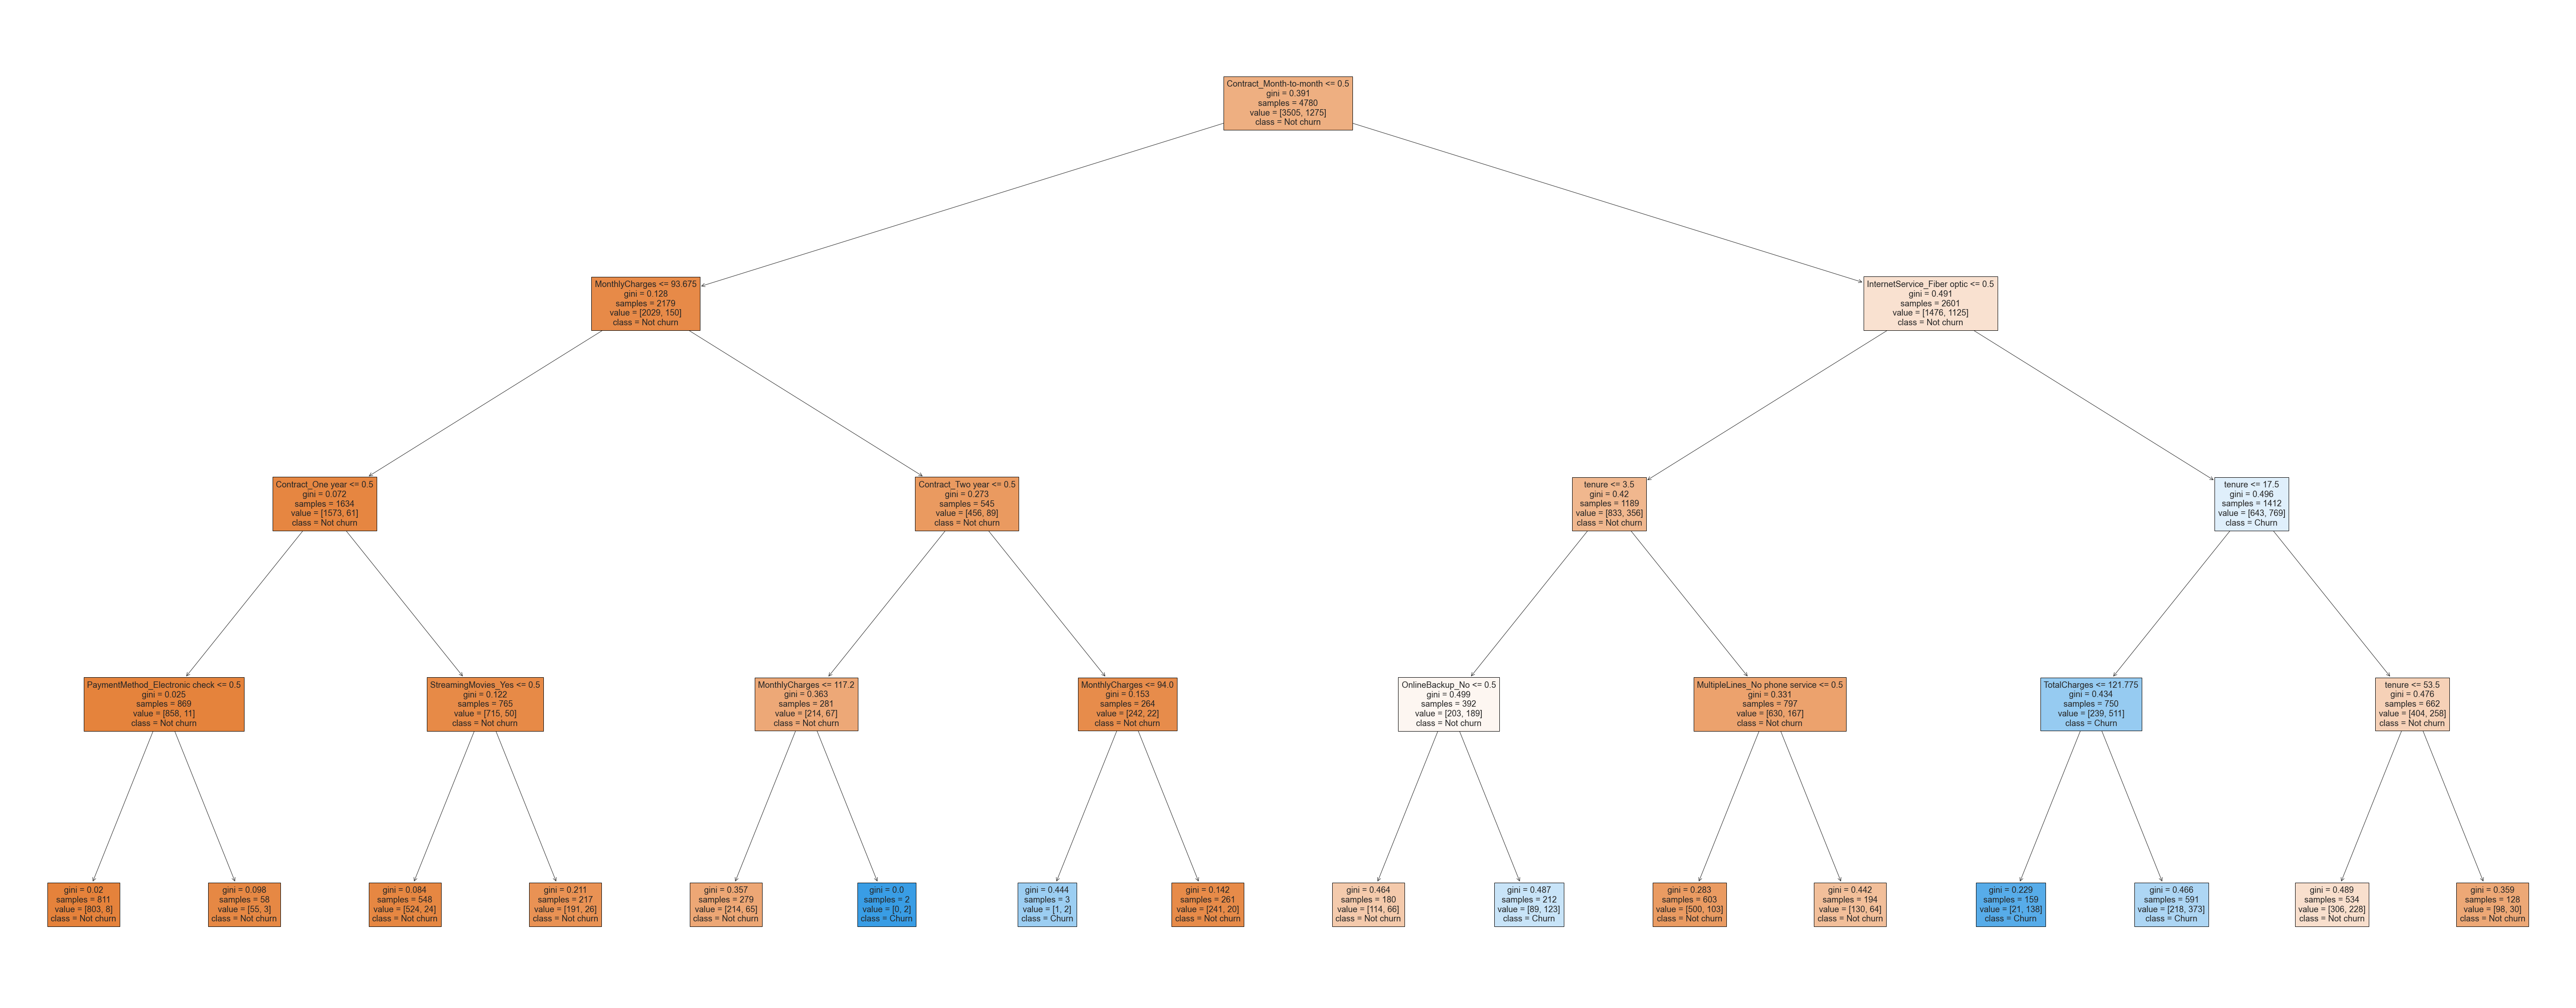

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

from IPython.display import SVG, display

target_col = ['Churn']
cols = [i for i in data_A_dummy_final.columns if i not in target_col]


decision_tree = DecisionTreeClassifier(max_depth = 4, random_state = 123,
                                       splitter = "best", criterion = "gini")

decision_tree.fit(X_train_noscale, y_train_noscale)
fig = plt.figure(figsize=(100,40))
a = tree.plot_tree(decision_tree, 
                   feature_names=cols,  
                   class_names=["Not churn", "Churn"],
                   filled=True)


#https://mljar.com/blog/visualize-decision-tree/
#Does it make sense how 

In [ ]:
#improve accuracy https://www.kaggle.com/youssefbenfarhat/86-8-auc-using-voting-and-stacking

In [51]:
X_test[2]

array([ 2.27735272, -1.04180958,  0.29574146, -0.77087039, -0.98143075,
       -0.96966991, -0.65157735,  0.33035042, -0.33035042,  1.16109155,
       -0.72636586,  1.12908734, -0.52338208, -0.63286301,  1.1379503 ,
       -0.52338208, -0.7325584 , -0.52338208, -0.72314299, -0.52338208,
       -0.6388314 , -0.52338208, -0.7918383 , -0.52338208, -0.80166128,
        0.9099901 , -0.5207868 , -0.56137407, -1.19924497, -0.52778998,
       -0.7108373 ,  1.84056111,  0.4313742 , -1.57427226])

In [ ]:
Voting.predict(X_test)

# Build a user interface for managers

In [ ]:
import flask
import pickle
# Use pickle to load in the pre-trained model.
with open(f'model/bike_model_xgboost.pkl', 'rb') as f:
    model = pickle.load(f)
app = flask.Flask(__name__, template_folder='templates')
@app.route('/')



def main():
    if flask.request.method == 'GET':
        return(flask.render_template('main.html'))
    if flask.request.method == 'POST':
        temperature = flask.request.form['temperature']
        humidity = flask.request.form['humidity']
        windspeed = flask.request.form['windspeed']
        input_variables = pd.DataFrame([[temperature, humidity, windspeed]],
                                       columns=['temperature', 'humidity', 'windspeed'],
                                       dtype=float)
        prediction = model.predict(input_variables)[0]
        return flask.render_template('main.html',
                                     original_input={'Temperature':temperature,
                                                     'Humidity':humidity,
                                                     'Windspeed':windspeed},
                                     result=prediction,
                                     )
   






if __name__ == '__main__':
    app.run()
   

    
#https://blog.cambridgespark.com/deploying-a-machine-learning-model-to-the-web-725688b851c7

In [4]:
# Start Dashboard
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [ ]:
#app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='DAIP Case 5'),

    html.Div(children='''
        Prediction: Put in your values to find out if the client will churn or not.
    '''),
    html.Label('Dropdown'),
    dcc.Feature1(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Label('Dropdown'),
    dcc.Feature2(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Label('Dropdown'),
    dcc.Feature3(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Label('Dropdown'),
    dcc.Feature4(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Feature5('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Feature6('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Label('Dropdown'),
    dcc.Feature7(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.Label('Dropdown'),
    dcc.Feature8(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),
    html.H6("Feature9"),
    html.Div(["Input: ",
              dcc.Input(id='my-input', value='initial value', type='text')]),
    html.Br(),
    html.Div(id='my-output')   
    
    
])

@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)


if __name__ == '__main__':
    app.run_server(debug=True)